In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
from matplotlib.patches import Polygon


In [2]:
path = './precip.mon.ltm.nc'
ncfile = xr.open_dataset(path)
print(ncfile)

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon                 (lon) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    curator:                        Dr. Jian-Jian Wang\nESSIC, University of ...
    description:                    http://eagle1.umd.edu/GPCP_ICDR/GPCPmonth...
    citation:                       Adler, R.F., G.J. Huffman, A. Chang, R. F...
    title:                          GPCP Version 2.3 Combined Precipitation D...
    platform:                       NOAA POES (Polar Orbiting Environm

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Data Processing

In [3]:
#select variables
precip = ncfile.data_vars['precip']
print(precip)
print(precip.shape)

<xarray.DataArray 'precip' (time: 12, lat: 72, lon: 144)>
[124416 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:     Long Term Mean Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [5.6044193e-04 3.0161072e+01]
(12, 72, 144)


In [4]:
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(0)

In [5]:
#print time info.
print(precip.time)

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(1, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 2, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 3, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 4, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 5, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 6, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 7, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 8, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 9, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 10, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 11, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 12, 1, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object

In [6]:
#Select USA domain
precip_usa = precip.sel(lon=slice(225, 295),lat=slice(20,60))
# pick slightly larger for visualization
print(precip_usa.shape) #(time, lon, lat)=(12,16,28)

#calcualte RMS (Root Mean Square) std
rms=precip_usa.std(dim = 'time')
#std example : https://url.kr/rn6mvo
#각 lat, lon의 전체 기간에 대한 std을 구하는 건가?
#시간 dimension이 사라짐. 

print(rms)
print(rms.shape) #(lat, lon) = (16, 28) 

(12, 16, 28)
<xarray.DataArray 'precip' (lat: 16, lon: 28)>
array([[0.2926685 , 0.30302483, 0.33101517, 0.36275277, 0.39701474,
        0.3811006 , 0.403455  , 0.421538  , 0.5446736 , 0.60877424,
        0.9765126 , 4.0433373 , 2.7548249 , 1.5738686 , 2.1024    ,
        2.3103225 , 1.1026267 , 1.6192552 , 1.7161454 , 1.3678104 ,
        1.6076367 , 1.7627763 , 1.9942648 , 1.3864498 , 0.8347253 ,
        0.44742557, 0.5794701 , 0.6283862 ],
       [0.29126355, 0.29022384, 0.2870776 , 0.256075  , 0.27283758,
        0.25529453, 0.2668365 , 0.255155  , 0.22184025, 0.6496381 ,
        1.5174145 , 2.8076403 , 1.4668144 , 0.7441839 , 1.4425963 ,
        0.9637321 , 0.95894164, 0.8882452 , 0.6722494 , 0.77948326,
        1.1779016 , 1.8179744 , 1.3445715 , 0.7479757 , 0.7287004 ,
        0.7465663 , 0.78380877, 0.69964176],
       [0.3314236 , 0.28884974, 0.2507817 , 0.21574497, 0.19858164,
        0.19144058, 0.16471124, 0.15084347, 0.18605311, 0.5890763 ,
        2.024166  , 1.9522709 , 0.

In [7]:
#Area average 
region1 = precip.sel(lon=slice(232,238), lat = slice(45,51)).mean(dim=['lon','lat'])
region2 = precip.sel(lon=slice(262,267), lat = slice(38,44)).mean(dim=['lon','lat'])
print(region1) #[time] 설정한 lon, lat에 대해 aave함. time dimension만 남음. 
print(region2) #[time]

<xarray.DataArray 'precip' (time: 12)>
array([10.074272 ,  7.528137 ,  6.6028857,  4.852235 ,  3.0713537,
        2.44179  ,  1.3479197,  1.6779404,  2.8065453,  6.978965 ,
       10.529076 ,  9.918045 ], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
<xarray.DataArray 'precip' (time: 12)>
array([1.1058679, 1.3891217, 2.2461433, 3.198786 , 4.105555 , 4.597954 ,
       3.7256594, 3.4584997, 3.2561104, 2.4102938, 1.9538555, 1.4483463],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00


# Visualization

In [8]:
#customized function for bounding box
def draw_box(ax, m, lon1, lon2, lat1, lat2, idx):
    x1, y1 = m(lon1, lat1)
    x2, y2 = m(lon1, lat2)
    x3, y3 = m(lon2, lat2)
    x4, y4 = m(lon2, lat1)
    poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none', edgecolor='k',linewidth=2)
    ax.add_patch(poly)
    ax.annotate(text=idx, xy=m((lon1+lon2)/2, (lat1+lat2)/2),fontsize=15, fontweight='bold',
                horizontalalignment='center',verticalalignment='center')

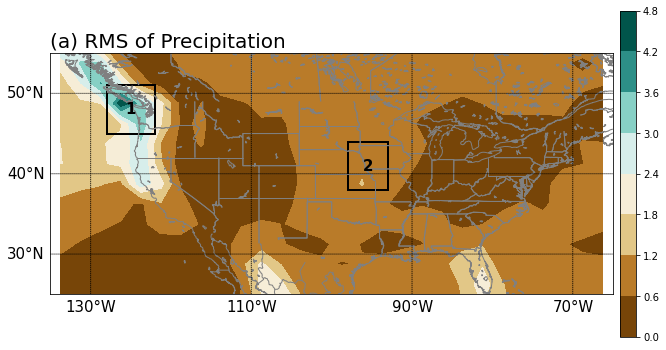

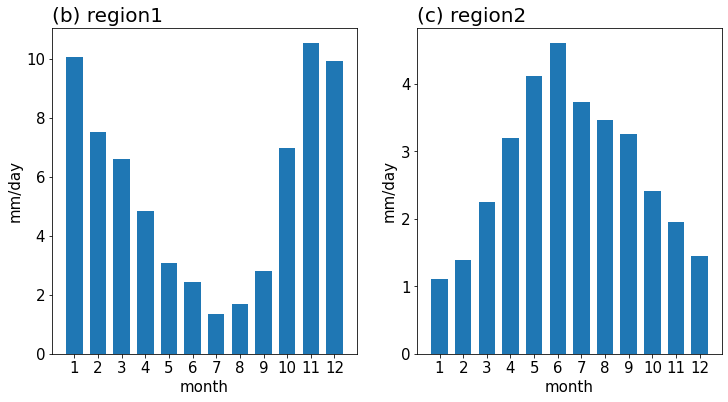

In [38]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

m = Basemap(
    lon_0=0, lat_0=0,
    llcrnrlon=225, llcrnrlat=25, urcrnrlon=295, urcrnrlat=55,
    resolution = 'i', ax=ax1)

coord = np.meshgrid(rms.lon, rms.lat)

#more info. about basemap toolkit
#https://matplotlib.org/basemap/api/basemap_api.html
m.drawcoastlines(linewidth=1, color='gray')
m.drawcounties(linewidth=1, color='gray')
m.drawstates(linewidth=1, color='gray')
m.drawparallels(np.linspace(30,50,3), labels=[1,0,0,0], fontsize=15)

#가로선, 위도와 평행한 선
#draw and labels parallels (latitude lines) for values (in degrees)
#given in the sequence circles. 
#labels : list of 4 values (default [0,0,0,0])
#[left, right, top, bottom] 
#ex) [1, 0, 0, 0] : labelled on the left of the plot
#ex) [1, 0, 0, 1] : lablled where they intersect the left and bottom of the plot.

m.drawmeridians(np.linspace(230,290,4), labels=[0,0,0,1], fontsize=15)
#세로선, 경도와 평행한 선.
#옵션은 drawparllels와 비슷. 

plot1 = m.contourf(coord[0],coord[1],rms, cmap=plt.cm.BrBG)
draw_box(ax1, m, 232,238,45,51, '1')
draw_box(ax1, m, 262,267,38,44, '2')

cbar = fig1.colorbar(plot1, ax = ax1, location='right', pad=0.01)
cbar.ax.tick_params(labelsize=10)

ax1.set_title('(a) RMS of Precipitation',loc='left', fontsize=20)

month = [str(x) for x in range(1,13)]


ax2[0].bar(month, region1, width=0.7)
ax2[0].set_title('(b) region1', loc='left', fontsize=20)
ax2[0].set_ylabel('mm/day', fontsize=15)
ax2[0].set_xlabel('month', fontsize=15)
ax2[0].tick_params(labelsize=15)

ax2[1].bar(month, region2, width=0.7)
ax2[1].set_title('(c) region2', loc='left', fontsize=20)
ax2[1].set_ylabel('mm/day', fontsize=15)
ax2[1].set_xlabel('month', fontsize=15)
ax2[1].tick_params(labelsize=15)


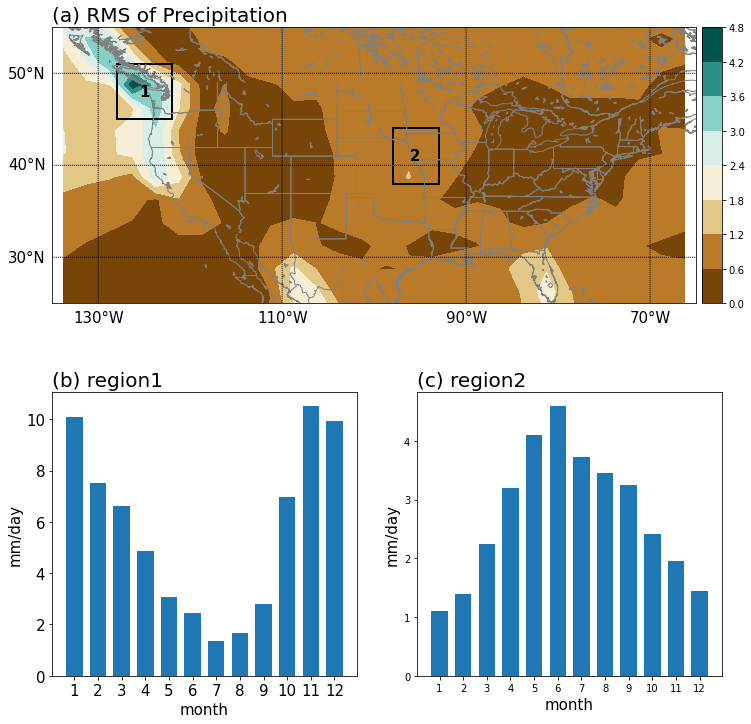

In [13]:
fig=plt.figure(figsize=(12,12))
spec = gridspec.GridSpec(ncols=2, nrows=2)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

top_ax = fig.add_subplot(spec[0,:])
bottom_left_ax = fig.add_subplot(spec[1,0])
bottom_right_ax=fig.add_subplot(spec[1,1])

m = Basemap(
    lon_0=0, lat_0=0,
    llcrnrlon=225, llcrnrlat=25, urcrnrlon=295, urcrnrlat=55,
    resolution = 'i', ax=top_ax)

coord = np.meshgrid(rms.lon, rms.lat)

#more info. about basemap toolkit
#https://matplotlib.org/basemap/api/basemap_api.html
m.drawcoastlines(linewidth=1, color='gray')
m.drawcounties(linewidth=1, color='gray')
m.drawstates(linewidth=1, color='gray')
m.drawparallels(np.linspace(30,50,3), labels=[1,0,0,0], fontsize=15)
#가로선, 위도와 평행한 선
#draw and labels parallels (latitude lines) for values (in degrees)
#given in the sequence circles. 
#labels : list of 4 values (default [0,0,0,0])
#[left, right, top, bottom] 
#ex) [1, 0, 0, 0] : labelled on the left of the plot
#ex) [1, 0, 0, 1] : lablled where they intersect the left and bottom of the plot.

m.drawmeridians(np.linspace(230,290,4), labels=[0,0,0,1], fontsize=15)
#세로선, 경도와 평행한 선.
#옵션은 drawparllels와 비슷. 

plot1 = m.contourf(coord[0],coord[1],rms, cmap=plt.cm.BrBG)
draw_box(top_ax, m, 232,238,45,51, '1')
draw_box(top_ax, m, 262,267,38,44, '2')

cbar=m.colorbar(plot1, ax=top_ax, location='right', pad='1%', size='3%')
cbar.ax.tick_params(labelsize=10)

top_ax.set_title('(a) RMS of Precipitation',loc='left', fontsize=20)

month = [str(x) for x in range(1,13)]


bottom_left_ax.bar(month, region1, width=0.7)
bottom_left_ax.set_title('(b) region1', loc='left', fontsize=20)
bottom_left_ax.set_ylabel('mm/day', fontsize=15)
bottom_left_ax.set_xlabel('month', fontsize=15)
bottom_left_ax.tick_params(labelsize=15)

bottom_right_ax.bar(month, region2, width=0.7)
bottom_right_ax.set_title('(c) region2', loc='left', fontsize=20)
bottom_right_ax.set_ylabel('mm/day', fontsize=15)
bottom_right_ax.set_xlabel('month', fontsize=15)
bottom_left_ax.tick_params(labelsize=15)


